### TP SI221 HMM et chaînes de Markov

#### Partie 1

In [235]:
import numpy as np

I.2.a)
- La première ligne de la matrice de transition correspond aux probabilités de la lettre de départ, ie le terme (1,j) de la matrice correspond à la probabilité que le mot commence par la lettre indexée par j

- La dernière colonne correspond à la probabilité de finir le mot lorsqu'on est situé sur la lettre correspondant à la ligne considérée, ie le terme (i,28) correspond à la probabilité de finir le mot lorsque la lettre considérée est la lettre indexée par i.

- 

In [236]:
filename_bigramen = 'bigramenglish.txt'
bigen = np.loadtxt(filename_bigramen)
dic={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' ','29' : str('.') }


In [237]:
print(type(bigen))

np.shape(bigen)

<class 'numpy.ndarray'>


(28, 28)

In [238]:
for i in range (len(bigen)):
    print ("la transition la plus fréquente depuis la lettre ", dic.get(str(i)), "est ")
    print(dic.get(str(np.argmax(bigen[i]))))

la transition la plus fréquente depuis la lettre  None est 
s
la transition la plus fréquente depuis la lettre    est 
m
la transition la plus fréquente depuis la lettre  a est 
d
la transition la plus fréquente depuis la lettre  b est 
n
la transition la plus fréquente depuis la lettre  c est 
z
la transition la plus fréquente depuis la lettre  d est 
z
la transition la plus fréquente depuis la lettre  e est 
z
la transition la plus fréquente depuis la lettre  f est 
z
la transition la plus fréquente depuis la lettre  g est 
d
la transition la plus fréquente depuis la lettre  h est 
m
la transition la plus fréquente depuis la lettre  i est 
n
la transition la plus fréquente depuis la lettre  j est 
z
la transition la plus fréquente depuis la lettre  k est 
d
la transition la plus fréquente depuis la lettre  l est 
d
la transition la plus fréquente depuis la lettre  m est 
z
la transition la plus fréquente depuis la lettre  n est 
m
la transition la plus fréquente depuis la lettre  o e

I.2.b)

In [239]:
def etat_suivant(state, bigram):
    probs = bigram[state]
    v = np.random.random(); # random value to choose the next state
    i = 0 # iterator
    fr = probs[0] # repartition function
    while v > fr:
        i +=1
        fr = fr + probs[i]
    return i+1 # matrix indices start at 0 so add +1

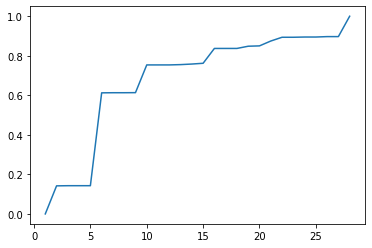

In [240]:
import matplotlib.pyplot as plt
# let's have a look at the repartition function of line 8 ( letter g)
rf = [bigen[8][0]] 
for j in range (1, len(bigen)):
    rf.append(bigen[8][j] + rf[j-1])
x = np.arange(1, 29)
plt.plot(x, rf)
plt.show()
    

In [241]:
def generate_state_seq (bigram):
    s = 1 #  current state 
    coded_w = [1]
    while s <28:
        s = etat_suivant(s, bigram)
        coded_w.append(s)
    return coded_w

def display_seq(coded_w):
    word = ''
    for i in range (len(coded_w)):
        #print(coded_w[i])
        letter = str(dic.get(str(coded_w[i])))
        #print(letter)
        word += letter
    return word
    

In [242]:
display_seq([5,6,7,8,1,28])

'defg  '

In [243]:
for i in range  (10):
    print(display_seq(generate_state_seq(bigen)))

 suiauieouiuioiueue 
  
 lore 
 beaeueeoopueele 
 dnuiopuiefhetr 
 shnueerhc 
 l 
 yvoliole 
 nborhgaoeooref 
 s 


I.2.c Générer des phrases

In [244]:
print( bigen[-1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


In [245]:
def modifie_mat_dic(bigram):
    bigr = bigram.copy().tolist()
    for i in range(27):
        bigr[i].append(0)
        bigr[i]= np.array(bigr[i])
    bigr[-1][-1] = 0.9
    bigr[-1].append(0.1)
    bigr[-1]= np.array(bigr[-1])
    bigr.append([0]*28)
    bigr[-1].append(1)
    bigr[-1] = np.array(bigr[-1])
        #print(type(bigr[-1]))
    return np.array(bigr, dtype=object)

In [246]:
modifie_mat_dic(bigen)

array([[0.0, 0.1126872, 0.043608943, 0.045454545, 0.032904451,
        0.022094495, 0.041763341, 0.01555579, 0.064437882, 0.068920059,
        0.0036384729, 0.0042185193, 0.023465514, 0.039759544,
        0.022832736, 0.070343809, 0.031058848, 0.0014237503, 0.025680236,
        0.066916262, 0.16452225, 0.010388104, 0.0070660198, 0.070502004,
        0.00010546298, 0.01059903, 5.2731491e-05, 0.0, 0.0],
       [0.0, 1.4701126e-05, 0.022933757, 0.033959601, 0.038075917,
        0.00014701126, 0.006174473, 0.024697892, 0.00088206757,
        0.037046838, 0.00088206757, 0.011907912, 0.081150216,
        0.035870748, 0.22051689, 0.00014701126, 0.018082385,
        1.4701126e-05, 0.094822263, 0.095410308, 0.13348623, 0.011760901,
        0.033371556, 0.0098497545, 0.00058804504, 0.01984652,
        0.00088206757, 0.067478169, 0.0],
       [0.0, 0.07187426, 0.00078982703, 7.8982703e-05, 0.00078982703,
        0.28275808, 7.8982703e-05, 7.8982703e-05, 7.8982703e-05,
        0.070294605, 0.00789

In [247]:
def generate_sentences(bigram):
    ans = display_seq(generate_state_seq(bigram))
    v = np.random.random()
    while v<0.9:
        ans+= display_seq(generate_state_seq(bigram))
        v = np.random.random()
    ans+= '.'
    
    return ans
    

In [248]:
for i in range(10):
    print(generate_sentences(bigen))

 nfhoueeoueioaeueaeoe  laoroohtrotr  nn  c  ble  tc  rauiolalo  ttmoiuoue  wpueoiet  tlaayauer  tmiaear  ge  nd  ttr  gaiorioersr  leiortg  ts  ne  m  me  dr  yaelor  vhloaeorhc  nnuelaaye  tnrue  vaoayae  ntsaie    s  gaaooue  letgttmdd    siue    m  fae  fe  nnotree  valioeihtce  ueor  lauiue  wvhnnue  m  tnnmo  s  g  yeueeeuiuie .
 m .
 iueeioaerfr  ttttceeuieooeer  s  iuelee  ttshnl  nn  vere    s  md  s  s  raeolaalye  gr  s  mear  nnmgaiayeaueouefr    ts  nuiuioe  c  kiueteopueueouel .
 nnvor  nraioetr  leaiue  tr  vnnueoe  tn .
 l  stsorpueoreeue  nnue  drc  shor  raaueueoaie  nnfhlaliopuoioor    rhcioaye  nshnr  nnfooe  nnue  tttcsye  ttrerm  lshswayaoiooayetc  ndsyaer  puealase  ue .
 letgiuie  tnve  n  rtsauor    shdm  lauiueleioo .
 s  le    n  nnuiueopuele .
 puiorioiue  kl  n  sao  nfhlor  s  tgieeoee .
 nue  yayeoiueolouettdsw  shorr  r  m  tss  nueleoopue  nraatnrttfroe  l .
 te  s  nwue  seao  nngior  lpuioeoeaue  ngee  vaiarhliae  siuale .


I.3 Reconnaissance de la langue

In [249]:
filename_bigramfr = 'bigramfrancais.txt'
bigfr = np.loadtxt(filename_bigramfr)

In [250]:
bigfrp = modifie_mat_dic(bigfr) # bigramfrancais modifié pour faire des phrases

In [251]:
a = 'abcdefg'[::-1]
print(a)


gfedcba


In [252]:

revdic = { v: k for k, v in dic.items()}
def calc_vraisemblance(bigram, texte):
    big = modifie_mat_dic(bigram)
    ans = [1]
    t=1
    for x in range (len(texte)):
        #print(texte[x])
        #print(int(revdic.get(texte[x])))
        t_1 = int(revdic.get(texte[x]))-1
        #print(type(int(revdic.get(texte[x]))))
        ans.append(big[t][t_1])
        t= t_1
    return np.prod(np.array(ans, dtype = float))

In [253]:
int(revdic.get('a'))

2

In [254]:
calc_vraisemblance(bigfr,'etre ou ne pas etre.')

0.0

In [255]:
calc_vraisemblance(bigen,'etre ou ne pas etre.')

0.0

In [256]:
calc_vraisemblance(bigen,'to be or not to be')

0.0

In [257]:
calc_vraisemblance(bigfr,'to be or not to be')

0.0

II.2 Génération de séquences d'observations

In [263]:
A0 = np.loadtxt('data_txt_compact\data_txt_compact\A0.txt')
B0 = np.loadtxt('data_txt_compact\data_txt_compact\B0.txt')
B0
#vect_p0 = np.loadtxt('data_txt_compact\data_txt_compact\vect_p0.txt')

array([[ 1.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00,
         1.0000000e+00],
       [-0.0000000e+00,  3.4782609e-04,  4.0909091e-04,  4.0909091e-04,
        -0.0000000e+00],
       [-0.0000000e+00,  3.4782609e-04,  4.0909091e-04,  1.8038262e-02,
        -0.0000000e+00],
       [-0.0000000e+00,  7.7916952e-02,  4.0909091e-04,  1.2903758e-01,
        -0.0000000e+00],
       [-0.0000000e+00,  1.1896372e-02,  1.6746933e-02,  4.0909091e-04,
        -0.0000000e+00],
       [-0.0000000e+00,  3.4782609e-04,  4.0909091e-04,  4.0909091e-04,
        -0.0000000e+00],
       [-0.0000000e+00,  3.4782609e-04,  2.6054922e-03,  3.1078398e-05,
        -0.0000000e+00],
       [-0.0000000e+00,  3.4782609e-04,  4.0909091e-04,  4.0909091e-04,
        -0.0000000e+00],
       [-0.0000000e+00,  3.4782609e-04,  2.4107545e-02,  4.0909091e-04,
        -0.0000000e+00],
       [-0.0000000e+00,  3.4782609e-04,  4.0909091e-04,  4.0909091e-04,
        -0.0000000e+00],
       [-0.0000000e+00,  1.787